# 1. The Basics

## 1.1 An example

https://docs.scipy.org/doc/numpy/user/quickstart.html

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

For example, the coordinates of a point in 3D space [1, 2, 1] has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.
- [[ 1., 0., 0.],
 [ 0., 1., 2.]]

NumPy’s array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:

- ndarray.ndim:
the number of axes (dimensions) of the array.

- ndarray.shape:
the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.

- ndarray.size:
the total number of elements of the array. This is equal to the product of the elements of shape.

- ndarray.dtype:
an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

- ndarray.itemsize:
the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

- ndarray.data:
the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [1]:
import numpy as np

In [3]:
a = np.arange(15); a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
a = a.reshape(3, -1); a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [7]:
a.ndim, a.shape, a.size, a.dtype, a.itemsize

(2, (3, 5), 15, dtype('int32'), 4)

In [8]:
a.data

In [9]:
b = np.array([6, 7, 8]); b

array([6, 7, 8])

In [10]:
type(b)

numpy.ndarray

## 1.2 Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [11]:
a = np.array([2, 3, 4]); a

array([2, 3, 4])

In [12]:
a.dtype

dtype('int32')

In [14]:
b = np.array([1.2, 3.5, 5.1]); b

array([ 1.2,  3.5,  5.1])

In [15]:
b.dtype

dtype('float64')

A frequent error consists in calling array with multiple numeric arguments, rather than providing a single list of numbers as an argument.

In [16]:
a = np.array(1,2,3,4)    # WRONG

ValueError: only 2 non-keyword arguments accepted

In [17]:
a = np.array([1,2,3,4])  # RIGHT

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [18]:
b = np.array([(1.5,2,3), (4,5,6)]); b

array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

The type of the array can also be explicitly specified at creation time:

In [19]:
c = np.array( [ [1,2], [3,4] ], dtype=complex ); c

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [21]:
np.zeros((3, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [29]:
np.ones((2, 3, 4), dtype=np.int16) # dtype can also be specified

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [23]:
np.empty((2, 3)) # uninitialized, output may vary

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

To create sequences of numbers, NumPy provides a function analogous to range that returns arrays instead of lists.

In [25]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [26]:
np.arange(0, 2, 0.3) # it accepts float arguments

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8])

When arange is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function linspace that receives as an argument the number of elements that we want, instead of the step:

In [27]:
np.linspace(0, 2, 9) # 9 numbers from 0 to 2

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [28]:
x = np.linspace(0, 2*np.pi, 100) # useful to evaluate function at lots of points
f = np.sin(x)

See also:

- array, zeros, zeros_like, ones, ones_like, empty, empty_like, arange, linspace, numpy.random.rand, numpy.random.randn, fromfunction, fromfile

## 1.3 Printing Arrays

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

- the last axis is printed from left to right,
- the second-to-last is printed from top to bottom,
- the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [31]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [33]:
b = np.arange(12).reshape(4, 3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [34]:
c = np.arange(24).reshape(2, 3, 4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


See below to get more details on reshape.

If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:

In [35]:
print(np.arange(10000))

[   0    1    2 ..., 9997 9998 9999]


In [36]:
print(np.arange(10000).reshape(100, 100))

[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]


To disable this behaviour and force NumPy to print the entire array, you can change the printing options using set_printoptions.

In [37]:
np.set_printoptions(threshold=np.nan)

## 1.4 Basic Operations

Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [46]:
a = np.array([20, 30, 40, 50])
b = np.arange(4); b

array([0, 1, 2, 3])

In [45]:
c = a-b; c

array([20, 29, 38, 47])

In [47]:
b**2

array([0, 1, 4, 9])

In [48]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [49]:
a<35

array([ True,  True, False, False], dtype=bool)

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the dot function or method:

In [50]:
A = np.array([[1,1], [0,1]])
B = np.array([[2,0], [3,4]])
print(A)
print(B)

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]


In [51]:
A*B # elementwise product

array([[2, 0],
       [0, 4]])

In [52]:
A.dot(B) # matrix product

array([[5, 4],
       [3, 4]])

In [53]:
np.dot(A, B)  # another matrix product

array([[5, 4],
       [3, 4]])

Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [65]:
a = np.ones((2, 3), dtype=int)
b = np.random.random((2, 3))

In [66]:
a *= 3; a

array([[3, 3, 3],
       [3, 3, 3]])

In [67]:
b += a; b

array([[ 3.31485764,  3.20157706,  3.10734882],
       [ 3.55334661,  3.97676844,  3.27877283]])

In [68]:
a += b; a  # b is not automatically converted to integer type

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [73]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3); b

array([ 0.        ,  1.57079633,  3.14159265])

In [74]:
b.dtype.name

'float64'

In [75]:
c = a + b
c.dtype.name

'float64'

In [76]:
d = np.exp(c*1j)
d.dtype.name

'complex128'

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class

In [78]:
a = np.random.random((2, 3)); a

array([[ 0.84999457,  0.19483224,  0.74256607],
       [ 0.19012923,  0.4391523 ,  0.49360479]])

In [79]:
a.sum(), a.max(), a.min()

(2.9102792106685307, 0.84999457339125017, 0.1901292319719855)

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [80]:
b = np.arange(12).reshape(3,4);b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [81]:
b.sum(axis=0)

array([12, 15, 18, 21])

In [82]:
b.sum(axis=1)

array([ 6, 22, 38])

In [92]:
b.sum(axis=1, keepdims=True)

array([[ 6],
       [22],
       [38]])

In [83]:
b.min(axis=1)

array([0, 4, 8])

In [93]:
b.min(axis=1, keepdims=True)

array([[0],
       [4],
       [8]])

In [84]:
b.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]], dtype=int32)

## 1.5 Univresal Functions

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [85]:
B = np.arange(3); B

array([0, 1, 2])

In [86]:
np.exp(B)

array([ 1.        ,  2.71828183,  7.3890561 ])

In [89]:
np.sqrt(B)

array([ 0.        ,  1.        ,  1.41421356])

In [91]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([ 2.,  0.,  6.])

See also
- all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj, corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum, mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose, var, vdot, vectorize, where

## 1.6 Indexing, Slicing and Iterating

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [95]:
a = np.arange(10)**3; a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [96]:
a[2]

8

In [97]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [99]:
a[:6:2] = -1000; a # equivalent to a[0:6:2] = -1000; from start to position 6, exclusive, set every 2nd element to -1000

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729], dtype=int32)

In [101]:
a[::-1] # reverse a

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1, -1000], dtype=int32)

In [106]:
for i in a:
    print(i**(1/3.))

nan
1.0
nan
3.0
nan
5.0
6.0
7.0
8.0
9.0


C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [107]:
def f(x, y):
    return 10*x+y

In [109]:
(5,4)

(5, 4)

In [108]:
b = np.fromfunction(f, (5,4), dtype=int); b # The resulting array therefore has a value fn(x, y, z) at coordinate (x, y, z).

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [110]:
b[2,3]

23

In [111]:
b[0:5, 1]

array([ 1, 11, 21, 31, 41])

In [112]:
b[:, 1]

array([ 1, 11, 21, 31, 41])

In [113]:
b[1:3, :]

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [114]:
b[-1] # b[-1, :]

array([40, 41, 42, 43])

The expression within brackets in b[i] is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as b[i,...].

The dots (...) represent as many colons as needed to produce a complete indexing tuple. For example, if x is an array with 5 axes, then

- x[1,2,...] is equivalent to x[1,2,:,:,:],
- x[...,3] to x[:,:,:,:,3] and
- x[4,...,5,:] to x[4,:,:,5,:].

In [117]:
c = np.arange(12).reshape(2,2,3); c

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [118]:
c.shape

(2, 2, 3)

In [119]:
c[1, ...]

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [122]:
c[..., 2]

array([[ 2,  5],
       [ 8, 11]])

Iterating over multidimensional arrays is done with respect to the first axis:

In [123]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However, if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array:

In [124]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


See also
- Indexing, Indexing (reference), newaxis, ndenumerate, indices

# 2. Shape Manipulation

## 2.1 Changing the shape of an array

An array has a shape given by the number of elements along each axis:

In [138]:
a = np.floor(10*np.random.random((3,4))); a

array([[ 6.,  1.,  4.,  7.],
       [ 8.,  9.,  7.,  6.],
       [ 8.,  8.,  5.,  9.]])

In [139]:
a.shape

(3, 4)

The shape of an array can be changed with various commands. Note that the following three commands all return a modified array, but do not change the original array:

In [140]:
a.ravel() # returns the array, flattened

array([ 6.,  1.,  4.,  7.,  8.,  9.,  7.,  6.,  8.,  8.,  5.,  9.])

In [141]:
a.reshape(6,2)

array([[ 6.,  1.],
       [ 4.,  7.],
       [ 8.,  9.],
       [ 7.,  6.],
       [ 8.,  8.],
       [ 5.,  9.]])

In [142]:
a.T

array([[ 6.,  8.,  8.],
       [ 1.,  9.,  8.],
       [ 4.,  7.,  5.],
       [ 7.,  6.,  9.]])

In [143]:
a.T.shape, a.shape

((4, 3), (3, 4))

The order of the elements in the array resulting from ravel() is normally “C-style”, that is, the rightmost index “changes the fastest”, so the element after a[0,0] is a[0,1]. If the array is reshaped to some other shape, again the array is treated as “C-style”. NumPy normally creates arrays stored in this order, so ravel() will usually not need to copy its argument, but if the array was made by taking slices of another array or created with unusual options, it may need to be copied. The functions ravel() and reshape() can also be instructed, using an optional argument, to use FORTRAN-style arrays, in which the leftmost index changes the fastest.

The reshape function returns its argument with a modified shape, whereas the ndarray.resize method modifies the array itself:

In [144]:
a

array([[ 6.,  1.,  4.,  7.],
       [ 8.,  9.,  7.,  6.],
       [ 8.,  8.,  5.,  9.]])

In [145]:
a.resize((2,6)); a # modify the array itself

array([[ 6.,  1.,  4.,  7.,  8.,  9.],
       [ 7.,  6.,  8.,  8.,  5.,  9.]])

If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated:

In [146]:
a.reshape(3,-1)

array([[ 6.,  1.,  4.,  7.],
       [ 8.,  9.,  7.,  6.],
       [ 8.,  8.,  5.,  9.]])

See also
- ndarray.shape, reshape, resize, ravel

## 2.2 Stacking together different arrays 

Several arrays can be stacked together along different axes:

In [147]:
a = np.floor(10*np.random.random((2,2))); a

array([[ 3.,  6.],
       [ 0.,  5.]])

In [148]:
b = np.floor(10*np.random.random((2,2))); b

array([[ 9.,  2.],
       [ 4.,  7.]])

In [149]:
np.vstack((a,b))

array([[ 3.,  6.],
       [ 0.,  5.],
       [ 9.,  2.],
       [ 4.,  7.]])

In [150]:
np.hstack((a,b))

array([[ 3.,  6.,  9.,  2.],
       [ 0.,  5.,  4.,  7.]])

The function column_stack stacks 1D arrays as columns into a 2D array. It is equivalent to hstack only for 2D arrays:

In [151]:
from numpy import newaxis
np.column_stack((a,b)) # 2D array, same as hstack

array([[ 3.,  6.,  9.,  2.],
       [ 0.,  5.,  4.,  7.]])

In [152]:
a = np.array([4., 2.])
b = np.array([3., 8.])
np.column_stack((a,b)) # return a 2D aray

array([[ 4.,  3.],
       [ 2.,  8.]])

In [153]:
np.hstack((a,b)) # different result

array([ 4.,  2.,  3.,  8.])

In [154]:
a[:, newaxis] # this allows to have a 2D columns vector

array([[ 4.],
       [ 2.]])

In [155]:
np.column_stack((a[:, newaxis], b[:, newaxis]))

array([[ 4.,  3.],
       [ 2.,  8.]])

In [159]:
np.hstack((a[:, newaxis], b[:, newaxis])) # same result

array([[ 4.,  3.],
       [ 2.,  8.]])

On the other hand, the function row_stack is equivalent to vstack for any input arrays. In general, for arrays of with more than two dimensions, hstack stacks along their second axes, vstack stacks along their first axes, and concatenate allows for an optional arguments giving the number of the axis along which the concatenation should happen.

Note
- In complex cases, r_ and c_ are useful for creating arrays by stacking numbers along one axis. They allow the use of range literals (“:”)

In [160]:
np.r_[1:4, 0, 4]

array([1, 2, 3, 0, 4])

When used with arrays as arguments, r_ and c_ are similar to vstack and hstack in their default behavior, but allow for an optional argument giving the number of the axis along which to concatenate.

See also
- hstack, vstack, column_stack, concatenate, c_, r_

## 2.3 Splitting one array into several smaller ones

Using hsplit, you can split an array along its horizontal axis, either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [161]:
a = np.floor(10*np.random.random((2,12))); a

array([[ 9.,  3.,  6.,  8.,  0.,  2.,  3.,  6.,  4.,  6.,  5.,  3.],
       [ 2.,  9.,  8.,  6.,  4.,  1.,  7.,  0.,  7.,  7.,  3.,  6.]])

In [162]:
np.hsplit(a, 3) # split a into 3

[array([[ 9.,  3.,  6.,  8.],
        [ 2.,  9.,  8.,  6.]]), array([[ 0.,  2.,  3.,  6.],
        [ 4.,  1.,  7.,  0.]]), array([[ 4.,  6.,  5.,  3.],
        [ 7.,  7.,  3.,  6.]])]

In [163]:
np.hsplit(a, (3,4)) # split a after the third and the fourth column

[array([[ 9.,  3.,  6.],
        [ 2.,  9.,  8.]]), array([[ 8.],
        [ 6.]]), array([[ 0.,  2.,  3.,  6.,  4.,  6.,  5.,  3.],
        [ 4.,  1.,  7.,  0.,  7.,  7.,  3.,  6.]])]

vsplit splits along the vertical axis, and array_split allows one to specify along which axis to split

# 3 Copies and Views

When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:

## 3.1 No Copy at All

Simple assignments make no copy of array objects or of their data.

In [164]:
a = np.arange(12); a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [165]:
b = a # no new object is created
b is a # a and b are two names for the same ndarray object

True

In [166]:
b.shape

(12,)

In [167]:
b.shape=3,4; b # change the shape of a too

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [168]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Python passes mutable objects as references, so function calls make no copy.

In [169]:
def f(x):
    print(id(x))

In [170]:
id(a) # id is a unique identifier of an object

3184314242272

In [172]:
f(a) # same

3184314242272


## 3.2 View or Shallow Copy

Different array objects can share the same data. The view method creates a new array object that looks at the same data.

In [173]:
c = a.view()
c is a

False

In [174]:
c.base is a # c is a view of the data owned by a

True

In [175]:
c.flags.owndata

False

In [176]:
c.shape=2,6 # a's shape doesn't change
c.shape, a.shape

((2, 6), (3, 4))

In [178]:
c[0,4]=1234 # a's data changes
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

Slicing an array returns a view of it:

In [180]:
s = a[:, 1:3]; s

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [186]:
s[:]=10 # s[:] is a view of s. Note the difference between s=10 and s[:]=10
s

array([[10, 10],
       [10, 10],
       [10, 10]])

In [182]:
a # a's data changes

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

## 3.3 Deep Copy

The copy method makes a complete copy of the array and its data.

In [187]:
d = a.copy() # a new array object with new data is created
d is a

False

In [188]:
d.base is a # d doesn't share anything with a

False

In [189]:
d[0,0]=9999
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

## 3.4 Functions and Methods Overview

Here is a list of some useful NumPy functions and methods names ordered in categories. See Routines for the full list.

Array Creation
- arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like

Conversions
- ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat

Manipulations
- array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack

Questions
- all, any, nonzero, where

Ordering
- argmax, argmin, argsort, max, min, ptp, searchsorted, sort

Operations
- choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask, real, sum

Basic Statistics
- cov, mean, std, var

Basic Linear Algebra
- cross, dot, outer, linalg.svd, vdot

# 4 Less Basic

## 4.1 Broadcasting rules

Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have the same number of dimensions, a “1” will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the “broadcast” array.

After application of the broadcasting rules, the sizes of all arrays must match. More details can be found in https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html.

# 5 Fancy indexing and index tricks

NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.

## 5.1 Indexing with Arrays of Indices

In [192]:
a = np.arange(12)**2; a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [193]:
i = np.array([1,1,3,8,5])
a[i]

array([ 1,  1,  9, 64, 25])

In [194]:
j = np.array([[3,4],[9,7]]) # 2D array of indices
a[j] # same shape as j

array([[ 9, 16],
       [81, 49]])

When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following example shows this behavior by converting an image of labels into a color image using a palette.

In [195]:
palette = np.array([[0,0,0],         # black
                    [255,0,0],       # red
                    [0,255,0],       # green
                    [0,0,255],       # blue
                    [255,255,255]])  # white
image = np.array([[0,1,2,0],         # each value corresponds to a color in the palette
                  [0,3,4,0]])
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [198]:
palette.shape, image.shape

((5, 3), (2, 4))

We can also give indexes for more than one dimension. The arrays of indices for each dimension must have the same shape.

In [196]:
a = np.arange(12).reshape(3,4); a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [200]:
i = np.array([[0,1],
              [1,2]]) # indices for the first dim of a
j = np.array([[2,1],
              [3,3]]) # indices for the second dim of a

In [202]:
a[i]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [204]:
a[i,j]  # i and j must have equal shape

array([[ 2,  5],
       [ 7, 11]])

In [205]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [206]:
a[:,j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

Naturally, we can put i and j in a sequence (say a list) and then do the indexing with the list.

In [207]:
l = [i, j]
a[l]  # equivalent to a[i,j]

array([[ 2,  5],
       [ 7, 11]])

However, we can not do this by putting i and j into an array, because this array will be interpreted as indexing the first dimension of a.

In [208]:
s = np.array([i,j]); s # not what we want

array([[[0, 1],
        [1, 2]],

       [[2, 1],
        [3, 3]]])

In [218]:
tuple(s)

(array([[0, 1],
        [1, 2]]), array([[2, 1],
        [3, 3]]))

In [209]:
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [210]:
a[tuple(s)] # same as a[i,j]

array([[ 2,  5],
       [ 7, 11]])

Another common use of indexing with arrays is the search of the maximum value of time-dependent series:

In [211]:
time = np.linspace(20, 145, 5); time # time scale

array([  20.  ,   51.25,   82.5 ,  113.75,  145.  ])

In [212]:
data = np.sin(np.arange(20)).reshape(5,4); data # 4 time-dependent series

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [214]:
ind = data.argmax(axis=0); ind

array([2, 0, 3, 1], dtype=int64)

In [216]:
time_max = time[ind]; time_max

array([  82.5 ,   20.  ,  113.75,   51.25])

In [217]:
data_max = data[ind, range(data.shape[1])]; data_max # => data[ind[0], 0], data[ind[1],1] ...

array([ 0.98935825,  0.84147098,  0.99060736,  0.6569866 ])

In [221]:
np.all(data_max == data.max(axis=0))

True

You can also use indexing with arrays as a target to assign to:

In [224]:
a = np.arange(5); a

array([0, 1, 2, 3, 4])

In [225]:
a[[0,1,3,4]] = 0; a

array([0, 0, 2, 0, 0])

However, when the list of indices contains repetitions, the assignment is done several times, leaving behind the last value:

In [226]:
a = np.arange(5)
a[[0,0,2]] = [1,2,3]; a

array([2, 1, 3, 3, 4])

This is reasonable enough, but watch out if you want to use Python’s += construct, as it may not do what you expect:

In [227]:
a = np.arange(5)
a[[0,0,2]] += 1; a

array([1, 1, 3, 3, 4])

Even though 0 occurs twice in the list of indices, the 0th element is only incremented once. This is because Python requires “a+=1” to be equivalent to “a = a + 1”.

## 5.2 Indexing with Boolean Arrays

When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.

The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [228]:
a = np.arange(12).reshape(3,4); a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [229]:
b = a > 4; b # b is a boolean with a's shape

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [230]:
a[b] # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

This property can be very useful in assignments:

In [231]:
a[b] = 0; a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

You can look at the following example to see how to use boolean indexing to generate an image of the Mandelbrot set:
https://en.wikipedia.org/wiki/Mandelbrot_set

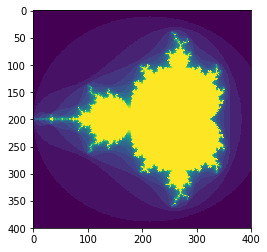

In [233]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

plt.imshow(mandelbrot(400,400))
plt.show()

The second way of indexing with booleans is more similar to integer indexing; for each dimension of the array we give a 1D boolean array selecting the slices we want:

In [235]:
a = np.arange(12).reshape(3,4); a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [237]:
b1 = np.array([False,True,True]) # first dim selection
b2 = np.array([True,False,True,False]) # second dim selection

In [238]:
a[b1,:] # selecting rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [239]:
a[b1] # same as a[b1,:]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [240]:
a[:,b2] # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [241]:
a[b1,b2] # a weird thing to do

array([ 4, 10])

Note that the length of the 1D boolean array must coincide with the length of the dimension (or axis) you want to slice. In the previous example, b1 has length 3 (the number of rows in a), and b2 (of length 4) is suitable to index the 2nd axis (columns) of a.

## 5.3 The ix_() function

The ix_ function can be used to combine different vectors so as to obtain the result for each n-uplet. For example, if you want to compute all the a+b*c for all the triplets taken from each of the vectors a, b and c:

In [242]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)

In [247]:
a.shape, b.shape, c.shape

((4,), (3,), (5,))

In [245]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [246]:
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [248]:
bx

array([[[8],
        [5],
        [4]]])

In [249]:
cx

array([[[5, 4, 6, 8, 3]]])

In [250]:
bx*cx

array([[[40, 32, 48, 64, 24],
        [25, 20, 30, 40, 15],
        [20, 16, 24, 32, 12]]])

In [251]:
(bx*cx).shape

(1, 3, 5)

In [253]:
result = ax+bx*cx; result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [254]:
result.shape

(4, 3, 5)

In [255]:
result[3,2,4]

17

In [256]:
a[3]+b[2]*c[4]

17

You could also implement the reduce as follows:

In [257]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

and then use it as:

In [258]:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

The advantage of this version of reduce compared to the normal ufunc.reduce is that it makes use of the Broadcasting Rules in order to avoid creating an argument array the size of the output times the number of vectors.

## 5.4 Indexing with strings

See Structured arrays.
https://docs.scipy.org/doc/numpy/user/basics.rec.html#structured-arrays

# 6 Linear Algebra

Work in progress. Basic linear algebra to be included here.

## 6.1 Simple Aray Operations

See linalg.py in numpy folder for more.

In [259]:
a = np.array([[1., 2.], [3., 4.]]); a

array([[ 1.,  2.],
       [ 3.,  4.]])

In [260]:
print(a)

[[ 1.  2.]
 [ 3.  4.]]


In [261]:
a.transpose()

array([[ 1.,  3.],
       [ 2.,  4.]])

In [262]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [265]:
u = np.eye(2); u # unit 2x2 matrix; "eye" represents "I"

array([[ 1.,  0.],
       [ 0.,  1.]])

In [266]:
j = np.array([[0., -1.], [1., 0.]]); j

array([[ 0., -1.],
       [ 1.,  0.]])

In [267]:
np.dot(j, j) # matrix product

array([[-1.,  0.],
       [ 0., -1.]])

In [268]:
np.trace(u) # Return the sum along diagonals of the array.

2.0

In [270]:
y = np.array([[5.], [7.]]); y

array([[ 5.],
       [ 7.]])

In [274]:
z = np.linalg.solve(a,y); z # Solve a linear matrix equation, or system of linear scalar equations

array([[-3.],
       [ 4.]])

In [275]:
np.allclose(np.dot(a, z), y) # Returns True if two arrays are element-wise equal within a tolerance.

True

In [276]:
np.linalg.eig(j)

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))

# 7 Tricks and Tips

Here we give a list of short and useful tips.

## 7.1 "Automatic" Reshaping

To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:

In [277]:
a = np.arange(30)
a.shape = 2,-1,3 # -1 means "whatever is needed"
a.shape

(2, 5, 3)

In [278]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

## 7.2 Vector Stacking

How do we construct a 2D array from a list of equally-sized row vectors? In MATLAB this is quite easy: if x and y are two vectors of the same length you only need do m=[x;y]. In NumPy this works via the functions column_stack, dstack, hstack and vstack, depending on the dimension in which the stacking is to be done. For example:

In [279]:
x = np.arange(0,10,2); x

array([0, 2, 4, 6, 8])

In [280]:
y = np.arange(5); y

array([0, 1, 2, 3, 4])

In [283]:
m = np.vstack([x,y]); m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [284]:
n = np.hstack([x,y]); n

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

The logic behind those functions in more than two dimensions can be strange.

## 7.3 Histograms

The NumPy histogram function applied to an array returns a pair of vectors: the histogram of the array and the vector of bins. Beware: matplotlib also has a function to build histograms (called hist, as in Matlab) that differs from the one in NumPy. The main difference is that pylab.hist plots the histogram automatically, while numpy.histogram only generates the data.

In [299]:
mu, sigma = 0, 1
v = np.random.normal(mu, sigma, 10000); v.shape

(10000,)

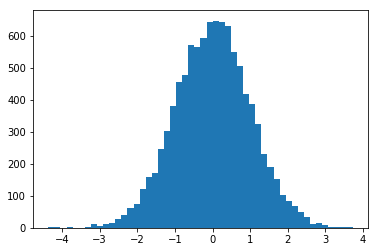

In [300]:
plt.hist(v, bins=50)
plt.show()

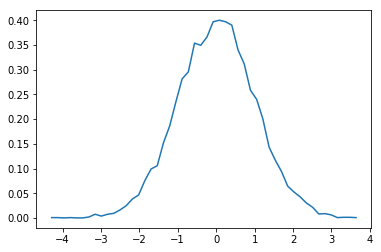

In [301]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True) # Numpy version (no plot)
plt.plot(0.5*(bins[1:]+bins[:-1]), n)
plt.show()